In [4]:
!pip install keras
!pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=6330f888433ba905b9432c6f5e05258aaa190073da47331dbf94bd50ad8039c0
  Stored in directory: c:\users\anodd\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10

In [8]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
df=web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2019-12-17')

In [10]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591938
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659611
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800155
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913449
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.701706
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.871681
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.780693


In [11]:
#Create a new dataframe with only the 'Close column'
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rowws to train the model on
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

1603

In [12]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [15]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [16]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [18]:
#Reshape the data
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [19]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 24s 14ms/step - loss: 5.5457e-04


In [24]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [25]:
#Convert the data to a numpy array
x_test= np.array(x_test)

In [26]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [27]:
#Get the models predicted prce values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [30]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.598270215988159

<ipython-input-32-0dc07d6efca5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


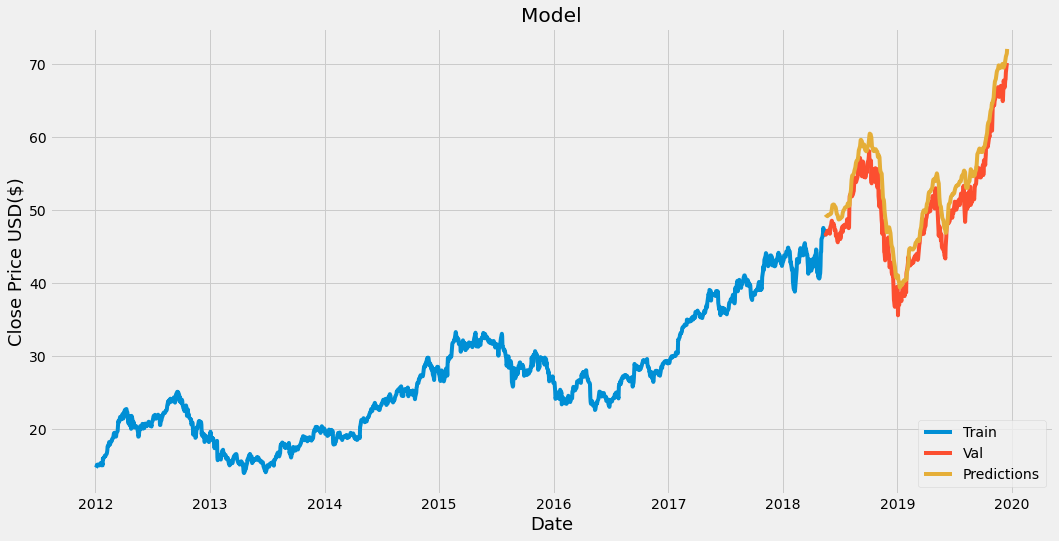

In [32]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [33]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,49.337090
2018-05-18,46.577499,49.276764
2018-05-21,46.907501,49.171745
2018-05-22,46.790001,49.133266
2018-05-23,47.090000,49.110394
...,...,...
2019-12-11,67.692497,70.339775
2019-12-12,67.864998,70.648239
2019-12-13,68.787498,70.951591


In [36]:
#Get the quote
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price =model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[72.60802]]


In [39]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
